In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

In [2]:
# Define the file path. Adjust the username and path to match your local environment.
file_path = '/Users/moritzrichter/Desktop/cryptocurrency_analysis/data/Solana_(SOL)/solana(fiveyears).csv'

# Load the dataset from the specified file path
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to ensure it has loaded correctly
df.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,Solana,2024-04-14,154.0832,122.6448,152.9253,140.2334,1.299938e+10,6.553613e+10
1,Solana,2024-04-13,175.6878,150.0654,173.0366,153.6610,6.849854e+09,7.449995e+10
2,Solana,2024-04-12,176.0544,170.5147,172.8637,172.9904,7.459802e+09,7.728614e+10
3,Solana,2024-04-11,175.2360,164.1298,172.1572,173.2881,7.052221e+09,7.602779e+10
4,Solana,2024-04-10,180.5807,170.4951,180.2091,172.7700,5.965575e+09,7.831791e+10


In [3]:
# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sorting the DataFrame by the 'Date' column in ascending order
df_sorted = df.sort_values(by='Date', ascending=True)

print(df_sorted)

        Name       Date        High         Low        Open       Close  \
1465  Solana 2020-04-10    0.744465    0.587102    0.663252    0.689381   
1464  Solana 2020-04-11    1.299801    0.609707    0.687634    0.946813   
1463  Solana 2020-04-12    1.049920    0.768842    0.947323    0.777010   
1462  Solana 2020-04-13    0.959297    0.763816    0.785999    0.896545   
1461  Solana 2020-04-14    0.879706    0.776557    0.879706    0.776557   
...      ...        ...         ...         ...         ...         ...   
4     Solana 2024-04-10  180.580700  170.495100  180.209100  172.770000   
3     Solana 2024-04-11  175.236000  164.129800  172.157200  173.288100   
2     Solana 2024-04-12  176.054400  170.514700  172.863700  172.990400   
1     Solana 2024-04-13  175.687800  150.065400  173.036600  153.661000   
0     Solana 2024-04-14  154.083200  122.644800  152.925300  140.233400   

            Volume     Marketcap  
1465  1.313219e+06  0.000000e+00  
1464  3.981549e+07  0.000000e

In [4]:
df_sorted.tail()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
4,Solana,2024-04-10,180.5807,170.4951,180.2091,172.7700,5.965575e+09,7.831791e+10
3,Solana,2024-04-11,175.2360,164.1298,172.1572,173.2881,7.052221e+09,7.602779e+10
2,Solana,2024-04-12,176.0544,170.5147,172.8637,172.9904,7.459802e+09,7.728614e+10
1,Solana,2024-04-13,175.6878,150.0654,173.0366,153.6610,6.849854e+09,7.449995e+10
0,Solana,2024-04-14,154.0832,122.6448,152.9253,140.2334,1.299938e+10,6.553613e+10


In [5]:
df_sorted.shape

(1466, 8)

In [6]:
# Check for null values in the Close column
df_sorted["Close"].isnull().values.any()

False

Text(0.5, 1.0, 'Close Price of Solana')

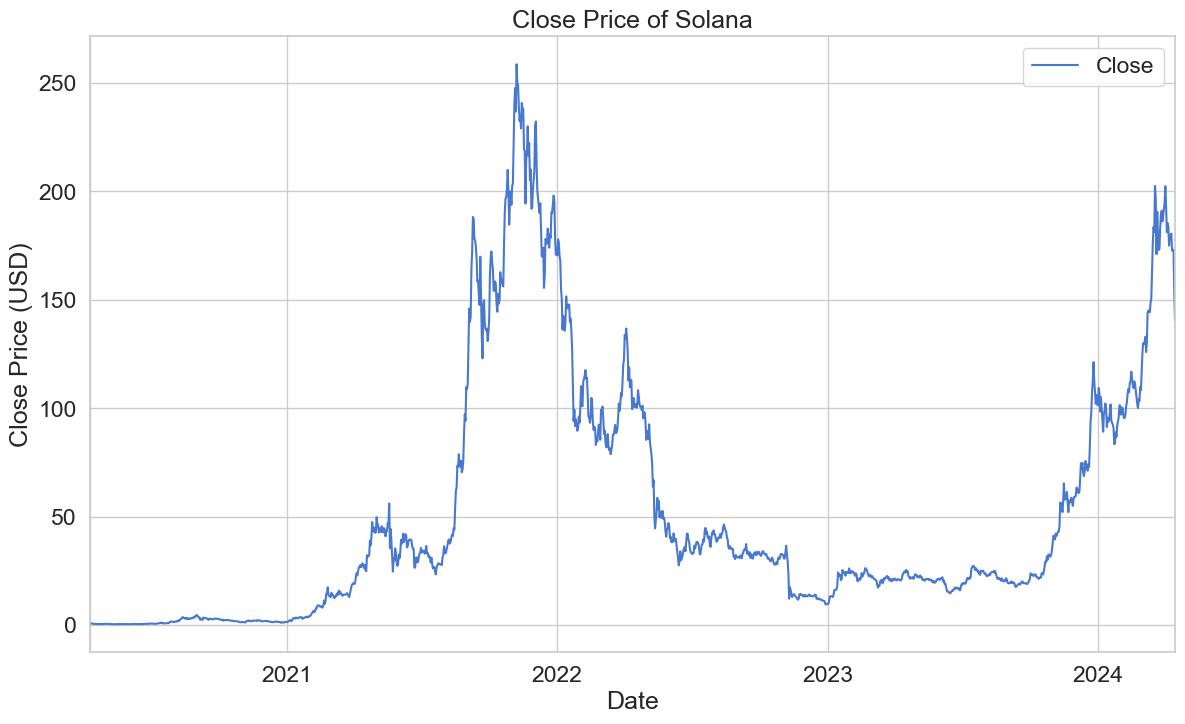

In [7]:
# Visualize the close price over time
ax = df_sorted.plot(x='Date', y='Close')
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
ax.set_title("Close Price of Solana")

# Examine the volatility for the year 2023

In [8]:
# Filter the dates for the year 2023
start_date = "2023-01-01"
end_date = "2023-12-31"

after_start_date = df_sorted["Date"] >= start_date
before_end_date = df_sorted["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
year_2023 = df_sorted.loc[between_two_dates]

print(year_2023)

       Name       Date        High         Low        Open       Close  \
469  Solana 2023-01-01   10.141100    9.670670    9.875224    9.951780   
468  Solana 2023-01-02   10.054436    9.705559    9.952850    9.954292   
467  Solana 2023-01-03   11.357444    9.843421    9.983122   11.250642   
466  Solana 2023-01-04   13.472413   11.078326   11.273604   13.351902   
465  Solana 2023-01-05   14.088800   12.873400   13.339900   13.420701   
..      ...        ...         ...         ...         ...         ...   
109  Solana 2023-12-27  120.895400  104.008700  120.895400  112.638700   
108  Solana 2023-12-28  114.901100  105.606300  113.284400  107.174800   
107  Solana 2023-12-29  109.301400   97.571500  107.432900  102.133800   
106  Solana 2023-12-30  109.761700  100.164700  102.078500  106.209800   
105  Solana 2023-12-31  107.106100  101.050600  106.091900  101.819200   

           Volume     Marketcap  
469  1.554625e+09  3.593555e+09  
468  7.382020e+08  3.591890e+09  
467  1.10

In [9]:
# Create a new dataframe showing only 2023
df_2023 = pd.DataFrame(data=year_2023)
df_2023.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
469,Solana,2023-01-01,10.141100,9.670670,9.875224,9.951780,1.554625e+09,3.593555e+09
468,Solana,2023-01-02,10.054436,9.705559,9.952850,9.954292,7.382020e+08,3.591890e+09
467,Solana,2023-01-03,11.357444,9.843421,9.983122,11.250642,1.108864e+09,3.910657e+09
466,Solana,2023-01-04,13.472413,11.078326,11.273604,13.351902,2.180517e+09,4.407272e+09
465,Solana,2023-01-05,14.088800,12.873400,13.339900,13.420701,4.136615e+09,4.899655e+09


Text(0.5, 1.0, 'Close Price of Solana in 2023')

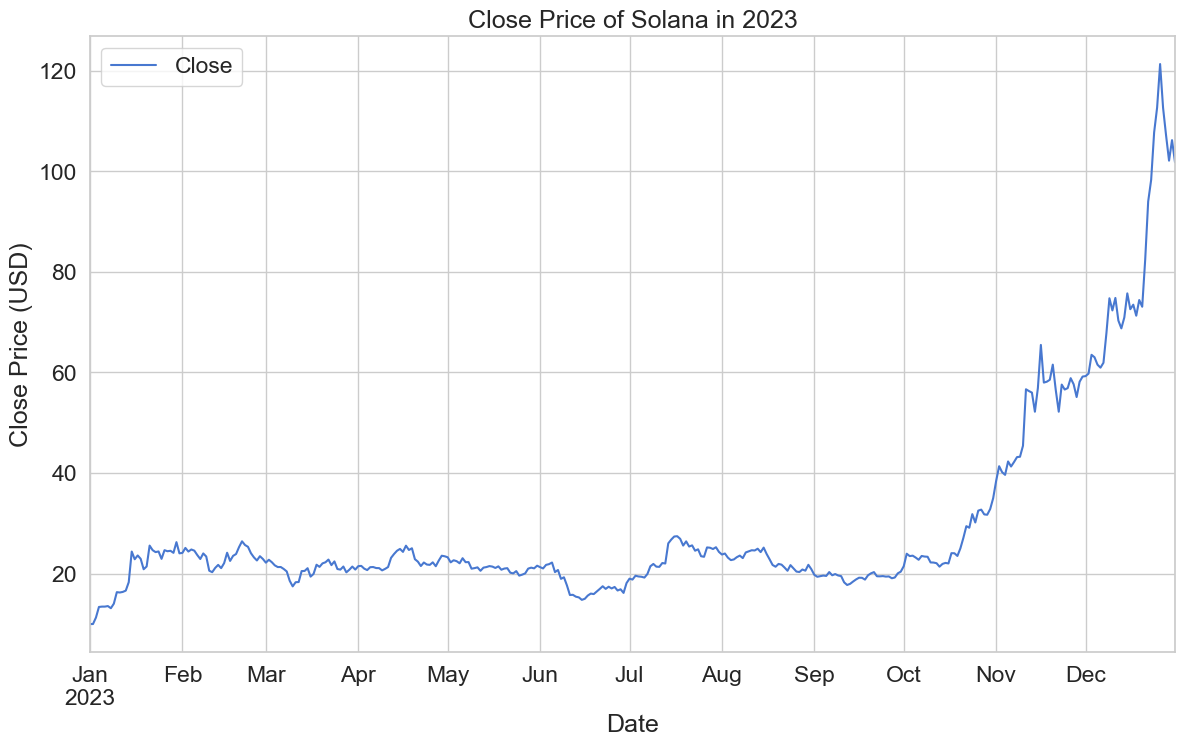

In [10]:
# Visualize the Ripple close price for 2023
ax = df_2023.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
ax.set_title("Close Price of Solana in 2023")

In [11]:
# Add a column called "Log_Returns" with the daily log return of the Close price
df_2023["Log_Returns"] = np.log(df_2023['Close']/df_2023['Close'].shift())
df_2023.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Log_Returns
469,Solana,2023-01-01,10.141100,9.670670,9.875224,9.951780,1.554625e+09,3.593555e+09,NaN
468,Solana,2023-01-02,10.054436,9.705559,9.952850,9.954292,7.382020e+08,3.591890e+09,0.000252
467,Solana,2023-01-03,11.357444,9.843421,9.983122,11.250642,1.108864e+09,3.910657e+09,0.122421
466,Solana,2023-01-04,13.472413,11.078326,11.273604,13.351902,2.180517e+09,4.407272e+09,0.171234
465,Solana,2023-01-05,14.088800,12.873400,13.339900,13.420701,4.136615e+09,4.899655e+09,0.005140


In [12]:
# We need the std deviation for the volatility of the stock
# df_2023["Log_Returns"].std()

# Volatility is defined as the annualized standard deviation. There are ~253 trading days per year. Square root = **.5
volatility_2023 = df_2023["Log_Returns"].std()*253**.5

In [13]:
# Calculate the volatility of the 2023 stock price of Solana
str_vol_2023 = str(round(volatility_2023, 4)*100)

print(str_vol_2023)

79.23


Text(0.5, 1.0, '2023 Solana Volatility: 79.23%')

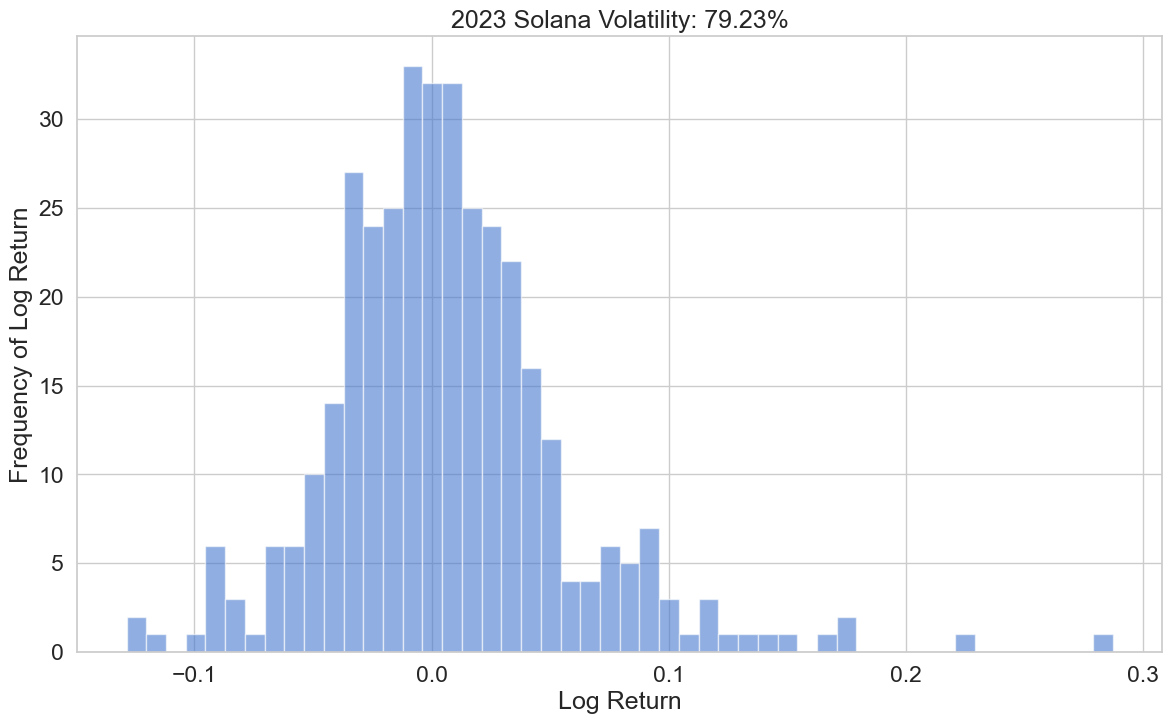

In [15]:
# Visualize the volatility of the 2023 stock price of Solana

fig, ax = plt.subplots()
df_2023["Log_Returns"].hist(ax=ax, bins=50, alpha=0.6, color="b")
ax.set_xlabel("Log Return")
ax.set_ylabel("Frequency of Log Return")
ax.set_title("2023 Solana Volatility: " + str_vol_2023 + "%" )

# Examine the volatility for the year 2022

In [16]:
# Filter the dates for the year 2022
start_date = "2022-01-01"
end_date = "2022-12-31"

after_start_date = df_sorted["Date"] >= start_date
before_end_date = df_sorted["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
year_2022 = df_sorted.loc[between_two_dates]

print(year_2022)

       Name       Date        High         Low        Open       Close  \
834  Solana 2022-01-01  177.324700  168.059059  172.554800  170.552237   
833  Solana 2022-01-02  178.760578  170.064632  170.064632  177.959500   
832  Solana 2022-01-03  179.322800  174.732200  178.694200  176.447400   
831  Solana 2022-01-04  176.518900  167.108771  176.518900  170.380300   
830  Solana 2022-01-05  173.773700  166.767442  170.339400  168.018706   
..      ...        ...         ...         ...         ...         ...   
474  Solana 2022-12-27   11.446800   11.129112   11.382130   11.296939   
473  Solana 2022-12-28   11.388567   10.749100   11.334604   11.088233   
472  Solana 2022-12-29   11.112095    9.522651   11.092981    9.763648   
471  Solana 2022-12-30    9.820564    8.115817    9.754603    9.581429   
470  Solana 2022-12-31   10.008505    9.024422    9.614819    9.858421   

           Volume     Marketcap  
834  1.723806e+09  5.350965e+10  
833  1.608897e+09  5.379897e+10  
832  1.32

In [17]:
# Create a new dataframe showing only 2022
df_2022 = pd.DataFrame(data=year_2022)
df_2022.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
834,Solana,2022-01-01,177.324700,168.059059,172.554800,170.552237,1.723806e+09,5.350965e+10
833,Solana,2022-01-02,178.760578,170.064632,170.064632,177.959500,1.608897e+09,5.379897e+10
832,Solana,2022-01-03,179.322800,174.732200,178.694200,176.447400,1.322319e+09,5.457994e+10
831,Solana,2022-01-04,176.518900,167.108771,176.518900,170.380300,1.269217e+09,5.340245e+10
830,Solana,2022-01-05,173.773700,166.767442,170.339400,168.018706,1.829127e+09,5.240419e+10


Text(0.5, 1.0, 'Close Price of Solana in 2022')

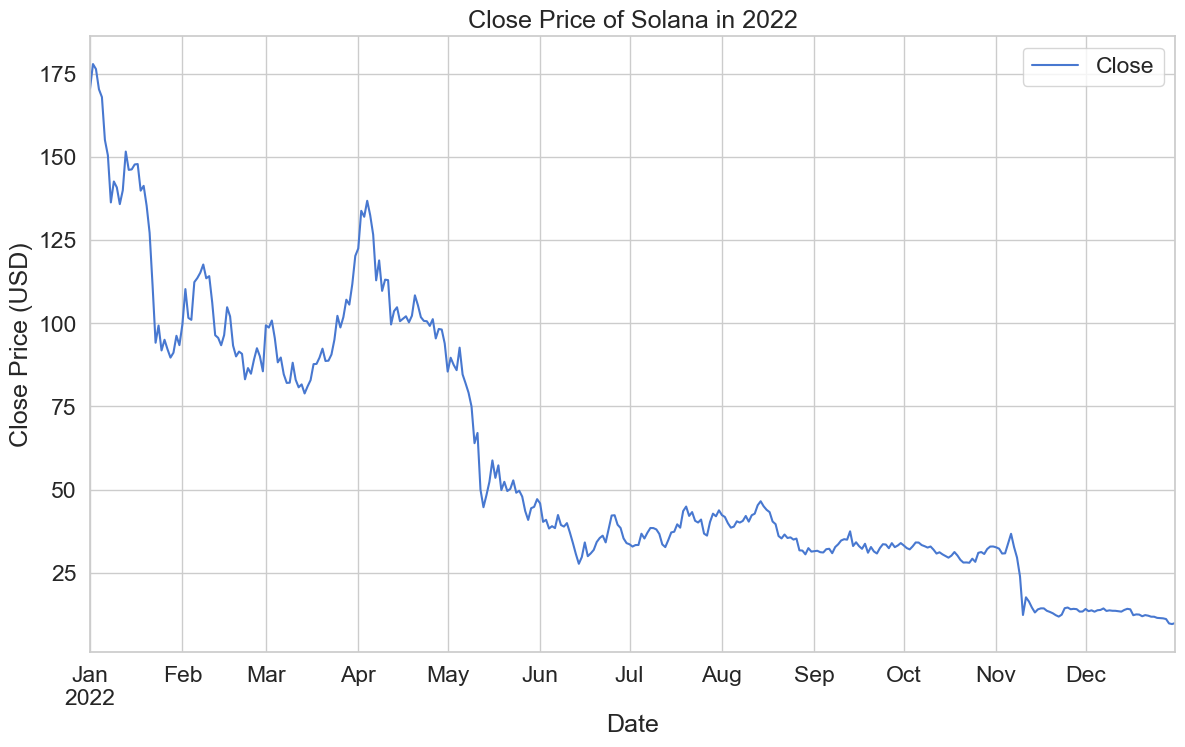

In [18]:
# Visualize the Solana close price for 2022
ax = df_2022.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
ax.set_title("Close Price of Solana in 2022")

In [19]:
# Add a column called "Log_Returns" with the daily log return of the Close price
df_2022["Log_Returns"] = np.log(df_2022['Close']/df_2022['Close'].shift())
df_2022.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Log_Returns
834,Solana,2022-01-01,177.324700,168.059059,172.554800,170.552237,1.723806e+09,5.350965e+10,NaN
833,Solana,2022-01-02,178.760578,170.064632,170.064632,177.959500,1.608897e+09,5.379897e+10,0.042514
832,Solana,2022-01-03,179.322800,174.732200,178.694200,176.447400,1.322319e+09,5.457994e+10,-0.008533
831,Solana,2022-01-04,176.518900,167.108771,176.518900,170.380300,1.269217e+09,5.340245e+10,-0.034990
830,Solana,2022-01-05,173.773700,166.767442,170.339400,168.018706,1.829127e+09,5.240419e+10,-0.013958


In [20]:
# We need the std deviation for the volatility of the stock
# df_2022["Log_Returns"].std()

# Volatility is defined as the annualized standard deviation. There are ~253 trading days per year. Square root = **.5
volatility_2022 = df_2022["Log_Returns"].std()*253**.5

In [21]:
# Calculate the volatility of the 2022 stock price of Solana
str_vol_2022 = str(round(volatility_2022, 3)*100)

print(str_vol_2022)

109.89999999999999


Text(0.5, 1.0, '2022 Solana Volatility: 109.89999999999999%')

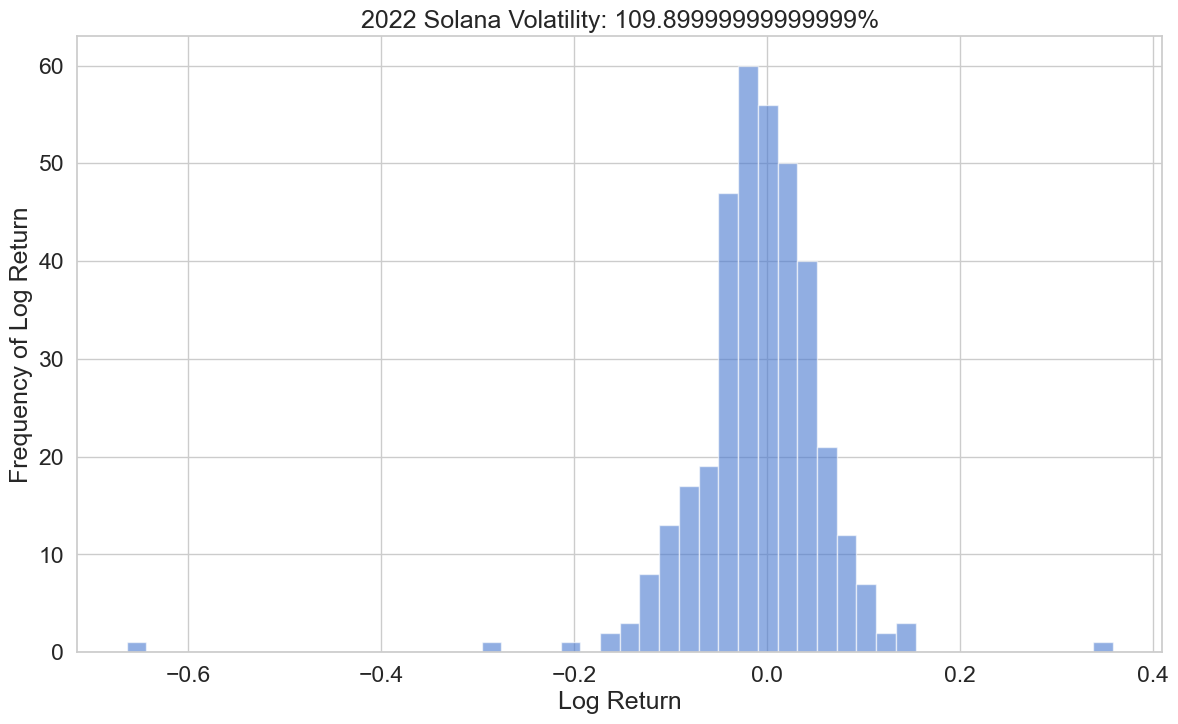

In [23]:
# Visualize the volatility of the 2022 stock price of Solana

fig, ax = plt.subplots()
df_2022["Log_Returns"].hist(ax=ax, bins=50, alpha=0.6, color="b")
ax.set_xlabel("Log Return")
ax.set_ylabel("Frequency of Log Return")
ax.set_title("2022 Solana Volatility: " + str_vol_2022 + "%" )

# Examine the volatility for the year 2021

In [24]:
# Filter the dates for the year 2021
start_date = "2021-01-01"
end_date = "2021-12-31"

after_start_date = df_sorted["Date"] >= start_date
before_end_date = df_sorted["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
year_2021 = df_sorted.loc[between_two_dates]

print(year_2021)

        Name       Date        High         Low        Open       Close  \
1199  Solana 2021-01-01    1.548185    1.430292    1.533061    1.514356   
1198  Solana 2021-01-02    1.850776    1.497772    1.506007    1.838092   
1197  Solana 2021-01-03    1.973781    1.722825    1.836459    1.787784   
1196  Solana 2021-01-04    2.342064    1.789787    1.789787    2.117643   
1195  Solana 2021-01-05    2.452242    1.884156    2.174927    2.450935   
...      ...        ...         ...         ...         ...         ...   
839   Solana 2021-12-27  199.919700  191.217300  193.302221  198.102011   
838   Solana 2021-12-28  204.338000  195.596580  198.023940  195.596580   
837   Solana 2021-12-29  195.727629  177.334358  195.727629  178.174200   
836   Solana 2021-12-30  180.537926  170.577107  177.376800  170.894077   
835   Solana 2021-12-31  175.550908  168.720570  170.565653  172.586000   

            Volume     Marketcap  
1199  3.816227e+07  6.985252e+07  
1198  4.975495e+07  7.672782e

In [25]:
# Create a new dataframe showing only 2021
df_2021 = pd.DataFrame(data=year_2021)
df_2021.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
1199,Solana,2021-01-01,1.548185,1.430292,1.533061,1.514356,3.816227e+07,6.985252e+07
1198,Solana,2021-01-02,1.850776,1.497772,1.506007,1.838092,4.975495e+07,7.672782e+07
1197,Solana,2021-01-03,1.973781,1.722825,1.836459,1.787784,8.951672e+07,8.402597e+07
1196,Solana,2021-01-04,2.342064,1.789787,1.789787,2.117643,1.225878e+08,9.487007e+07
1195,Solana,2021-01-05,2.452242,1.884156,2.174927,2.450935,1.749823e+08,1.031768e+08


Text(0.5, 1.0, 'Close Price of Solana in 2021')

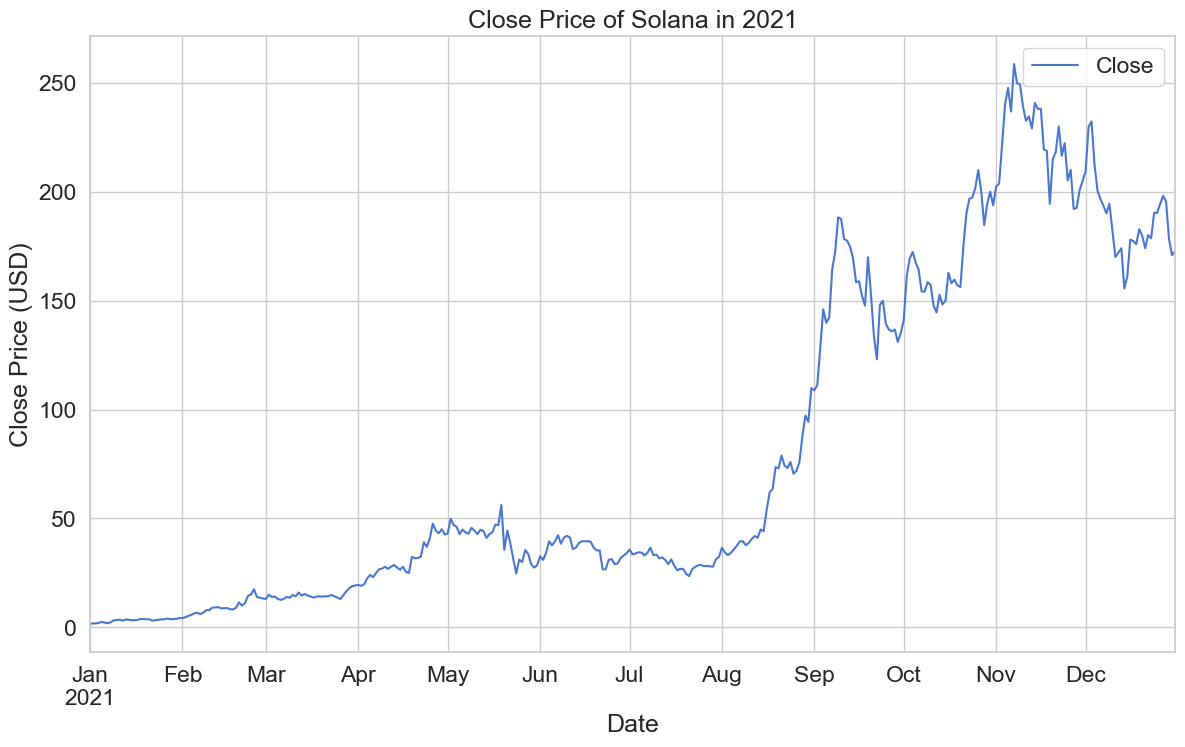

In [27]:
# Visualize the Ripple close price for 2021
ax = df_2021.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
ax.set_title("Close Price of Solana in 2021")

In [28]:
# Add a column called "Log_Returns" with the daily log return of the Close price
df_2021["Log_Returns"] = np.log(df_2021['Close']/df_2021['Close'].shift())
df_2021.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Log_Returns
1199,Solana,2021-01-01,1.548185,1.430292,1.533061,1.514356,3.816227e+07,6.985252e+07,NaN
1198,Solana,2021-01-02,1.850776,1.497772,1.506007,1.838092,4.975495e+07,7.672782e+07,0.193738
1197,Solana,2021-01-03,1.973781,1.722825,1.836459,1.787784,8.951672e+07,8.402597e+07,-0.027751
1196,Solana,2021-01-04,2.342064,1.789787,1.789787,2.117643,1.225878e+08,9.487007e+07,0.169327
1195,Solana,2021-01-05,2.452242,1.884156,2.174927,2.450935,1.749823e+08,1.031768e+08,0.146166


In [29]:
# We need the std deviation for the volatility of the stock
# df_2021["Log_Returns"].std()

# Volatility is defined as the annualized standard deviation. There are ~253 trading days per year. Square root = **.5
volatility_2021 = df_2021["Log_Returns"].std()*253**.5

In [30]:
# Calculate the volatility of the 2021 stock price of Solana
str_vol_2021 = str(round(volatility_2021, 2)*100)

print(str_vol_2021)

134.0


Text(0.5, 1.0, '2021 Ripple Volatility: 134.0%')

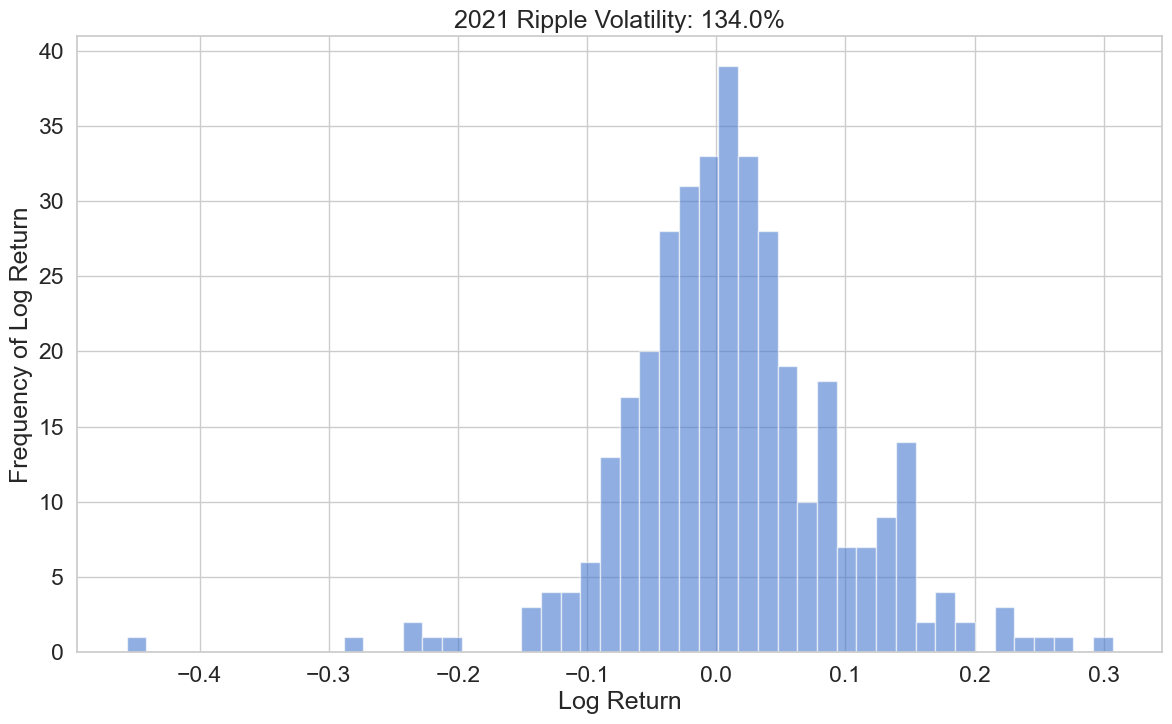

In [31]:
# Visualize the volatility of the 2021 stock price of Solana

fig, ax = plt.subplots()
df_2021["Log_Returns"].hist(ax=ax, bins=50, alpha=0.6, color="b")
ax.set_xlabel("Log Return")
ax.set_ylabel("Frequency of Log Return")
ax.set_title("2021 Ripple Volatility: " + str_vol_2021 + "%" )

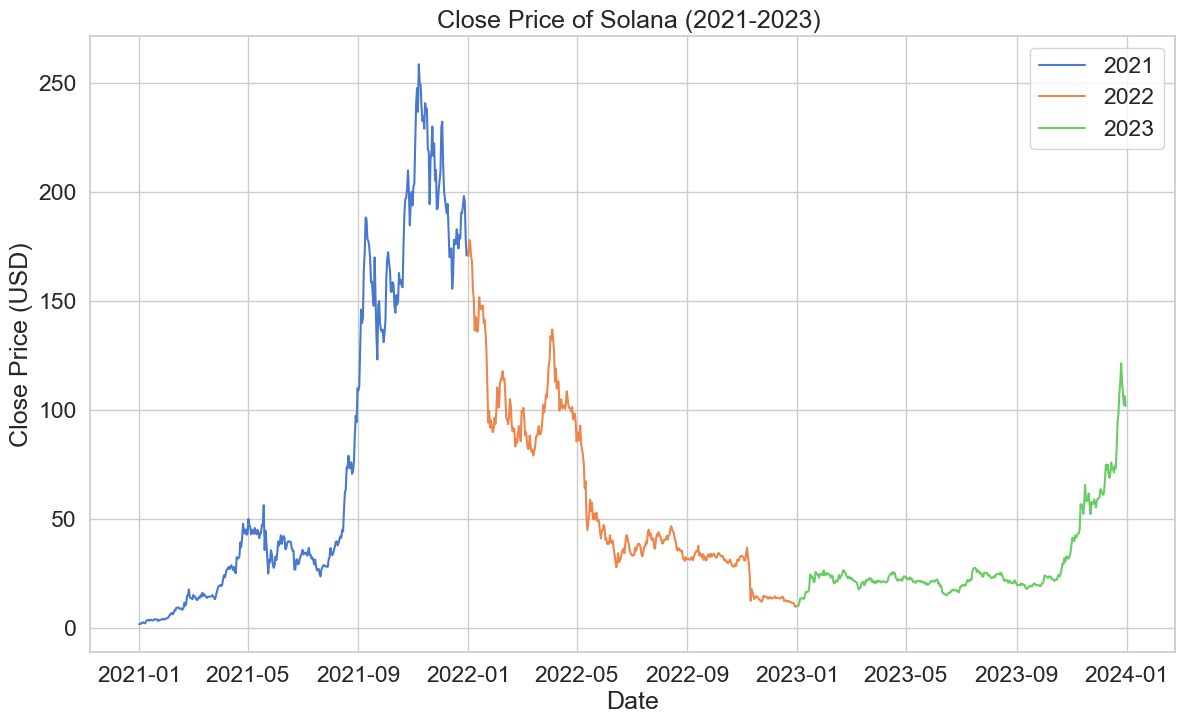

In [33]:
# Overlay the close price for 2021-2023

x1 = df_2021["Date"]
x2 = df_2022["Date"]
x3 = df_2023["Date"]

a = df_2021["Close"].values
b = df_2022["Close"].values
c = df_2023["Close"].values


plt.plot(x1, a, label= "2021" )
plt.plot(x2, b, label= "2022" )
plt.plot(x3, c, label= "2023" )

plt.title("Close Price of Solana (2021-2023) ")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")

plt.legend()
plt.show()

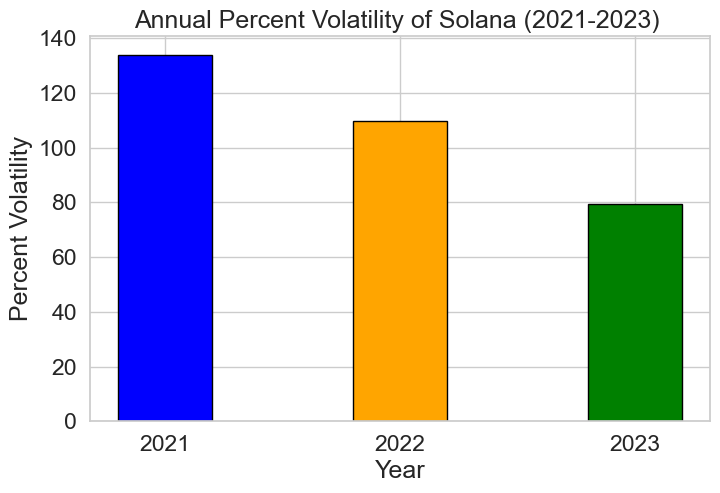

In [35]:
# Visualize the volatility percent as a bar chart
# plt.bar(x, height, width, bottom, align)

year = ["2021", "2022", "2023"]
values = [float(str_vol_2021), float(str_vol_2022), float(str_vol_2023)]

colors = ["blue", "orange", "green"]

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(x=year, height=values, color=colors, edgecolor='black', width = 0.4, bottom=0)
 
plt.xlabel("Year")
plt.ylabel("Percent Volatility")
plt.title("Annual Percent Volatility of Solana (2021-2023) ")
plt.show()